#  Objective: Develop a system that classifies resumes based on their content to determine whether they should be flagged for further review or not.

#  IMPORT LIBRARIES AND DATASETS

In [1]:
# install nltk
# used for natural language processing and to dealing with text data
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# install gensim
!pip install gensim


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations and array handling
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from wordcloud import WordCloud, STOPWORDS  # Generate word clouds from text
import nltk  # Natural Language Processing toolkit
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Text stemming and lemmatization
from nltk.corpus import stopwords  # Common stopwords for filtering
from nltk.tokenize import word_tokenize, sent_tokenize  # Tokenization of text
import gensim  # Topic modeling and document similarity
from gensim.utils import simple_preprocess  # Text preprocessing utility
from gensim.parsing.preprocessing import STOPWORDS  # Gensim's stopwords list
from sklearn.metrics import classification_report, confusion_matrix  # Model evaluation metrics


In [5]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [6]:
# load the data
resume_df = pd.read_csv("resume.csv" , encoding = "latin - 1")
resume_df


,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [7]:
resume_df = resume_df[['resume_text','class']]
resume_df


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [8]:
# data containing resume
resume_df.head(10)

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
5,\rPoultney VT - Email me on Indeed: indeed.com...,not_flagged
6,\rMedical Laboratory Scientist (Special Chemis...,not_flagged
7,Statistician\rBurlington VT - Email me on Inde...,flagged
8,Research technician\rBurlington VT - Email me ...,not_flagged
9,Barbara Hennessey-Elzohairy\rNewport VT - Emai...,not_flagged


In [9]:
resume_df.tail(10)

,resume_text,class
115,\rEssex Jct VT - Email me on Indeed: indeed.co...,flagged
116,Postdoctoral Associate - University of Vermon...,not_flagged
117,\rSpatial Analyst and UAV Flight Operator - Sp...,flagged
118,| Bioinformatics Analyst\rBurlington VT - Ema...,flagged
119,Professional\rNewbury VT - Email me on Indeed:...,not_flagged
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged
124,\rResearch and Development Scientist - Burling...,not_flagged


# PERFORM EXPLORATORY DATA ANALYSIS

In [10]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [11]:
# check for null values
resume_df.isnull()
resume_df.isnull().sum()


resume_text    0
class          0
dtype: int64

In [12]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [13]:
resume_df['class'] = resume_df['class'].apply(lambda x: 1 if x == "flagged" else 0)
resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [14]:
class_1_df = resume_df[resume_df['class'] == 1]
class_1_df

,resume_text,class
4,\rIndependent Consultant - Self-employed\rBurl...,1
7,Statistician\rBurlington VT - Email me on Inde...,1
10,Barbara Kurth\rResearch Assistant Professor Cl...,1
15,Caroline Clauson Work Study Student\rBrattlebo...,1
17,Chelsea Martin\rEnvironmental Scientist - Vana...,1
18,Christopher Fusting Data Science Consultant\rB...,1
23,David Grass\rCity Research Scientist - Environ...,1
24,David Lucero Public Health Analyst\rBurlington...,1
27,Drew Burkhard\rEnvironmental Scientist Meets M...,1
31,Eric Anderson Data Scientist\rBrattleboro VT -...,1


In [15]:
class_0_df = resume_df[resume_df['class'] == 0]
class_0_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
5,\rPoultney VT - Email me on Indeed: indeed.com...,0
...,...,...
119,Professional\rNewbury VT - Email me on Indeed:...,0
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0


# PERFORM DATA CLEANING

In [16]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))
resume_df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [17]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject','re','edu','use','email'])

In [20]:
#Token: In NLP and text processing, a token refers to a single unit of meaningful data. Tokens can be words, phrases, or symbols derived from a larger body of text. Tokenization is the process of splitting text into these individual units.
# Remove stop words and words with 2 or fewer characters
def preprocess(text):
    result = []  # List to hold processed tokens
    for token in gensim.utils.simple_preprocess(text):  # Tokenize and preprocess text
        # Check if token is not a stop word, longer than 2 characters, and not in custom stop_words
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)  # Add valid token to results
            
    return ' '.join(result)  # Return processed text as a single string


In [21]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [22]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington com aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research 

In [23]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

# VISUALIZE CLEANED DATASET

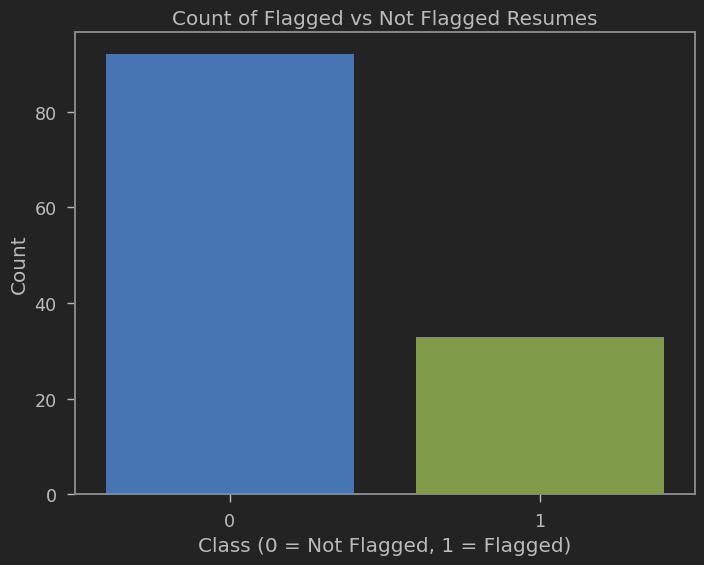

In [24]:
# Plot the counts of flagged vs not flagged
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(x='class', data=resume_df)  # Use x='class' to plot counts

# Set axis labels and title
plt.xlabel('Class (0 = Not Flagged, 1 = Flagged)')  # Label for x-axis
plt.ylabel('Count')  # Label for y-axis
plt.title('Count of Flagged vs Not Flagged Resumes')  # Title of the plot

# Show the plot
plt.show()


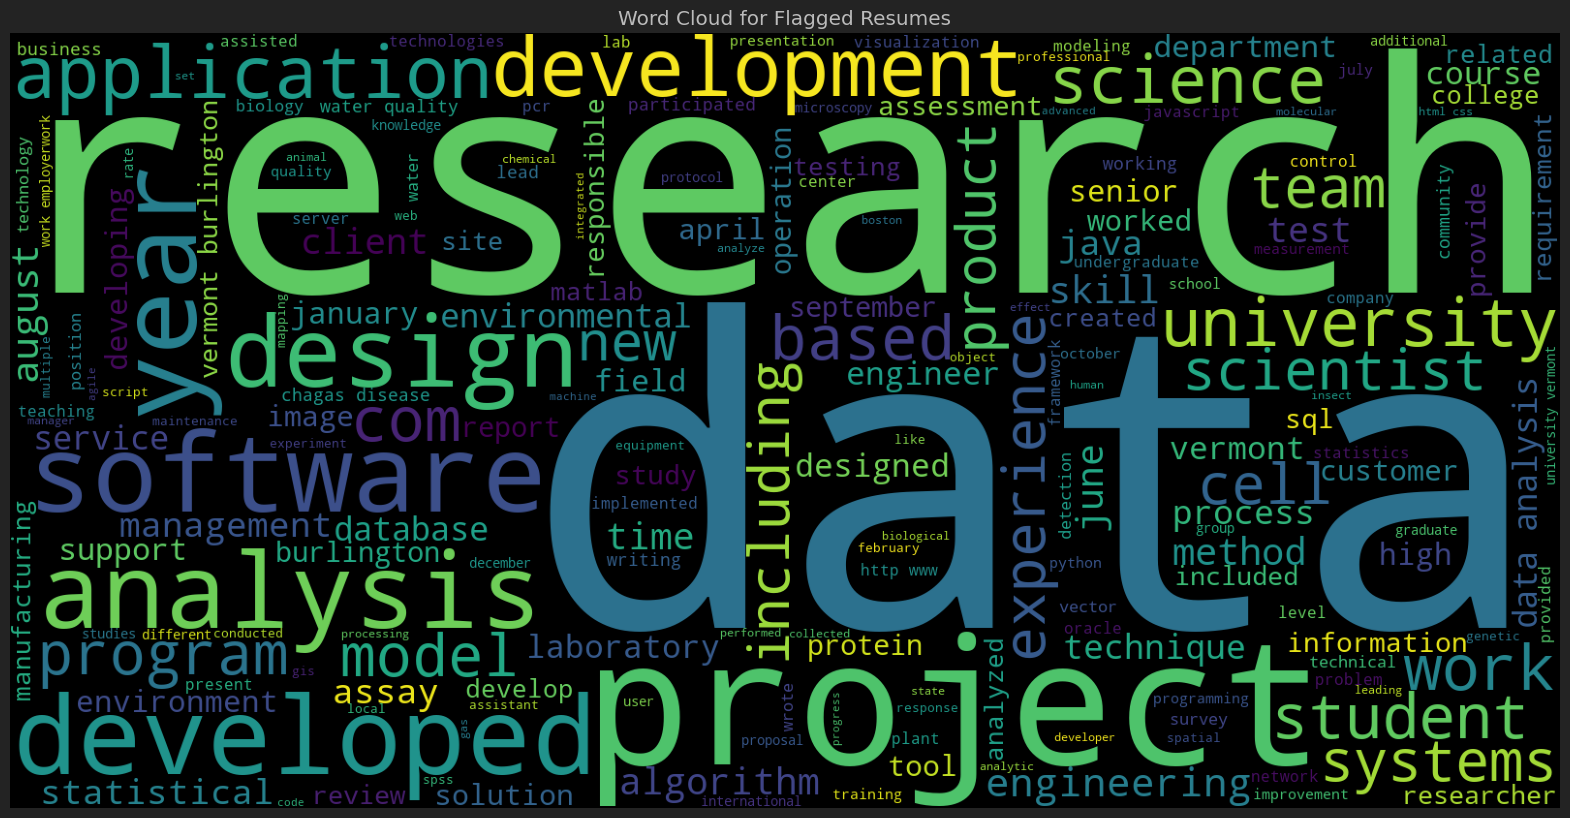

In [25]:
# Plot the word cloud for text that is flagged
plt.figure(figsize=(20, 20))  # Set the figure size for the plot

# Generate the word cloud from cleaned text of flagged resumes
wc = WordCloud(max_words=200, width=1600, height=800, stopwords=stop_words).generate(' '.join(resume_df[resume_df['class'] == 1]['cleaned']))

# Display the generated word cloud
plt.imshow(wc)  # Show the word cloud image
plt.axis('off')  # Hide axes for better visualization
plt.title('Word Cloud for Flagged Resumes')  # Title for the plot
plt.show()  

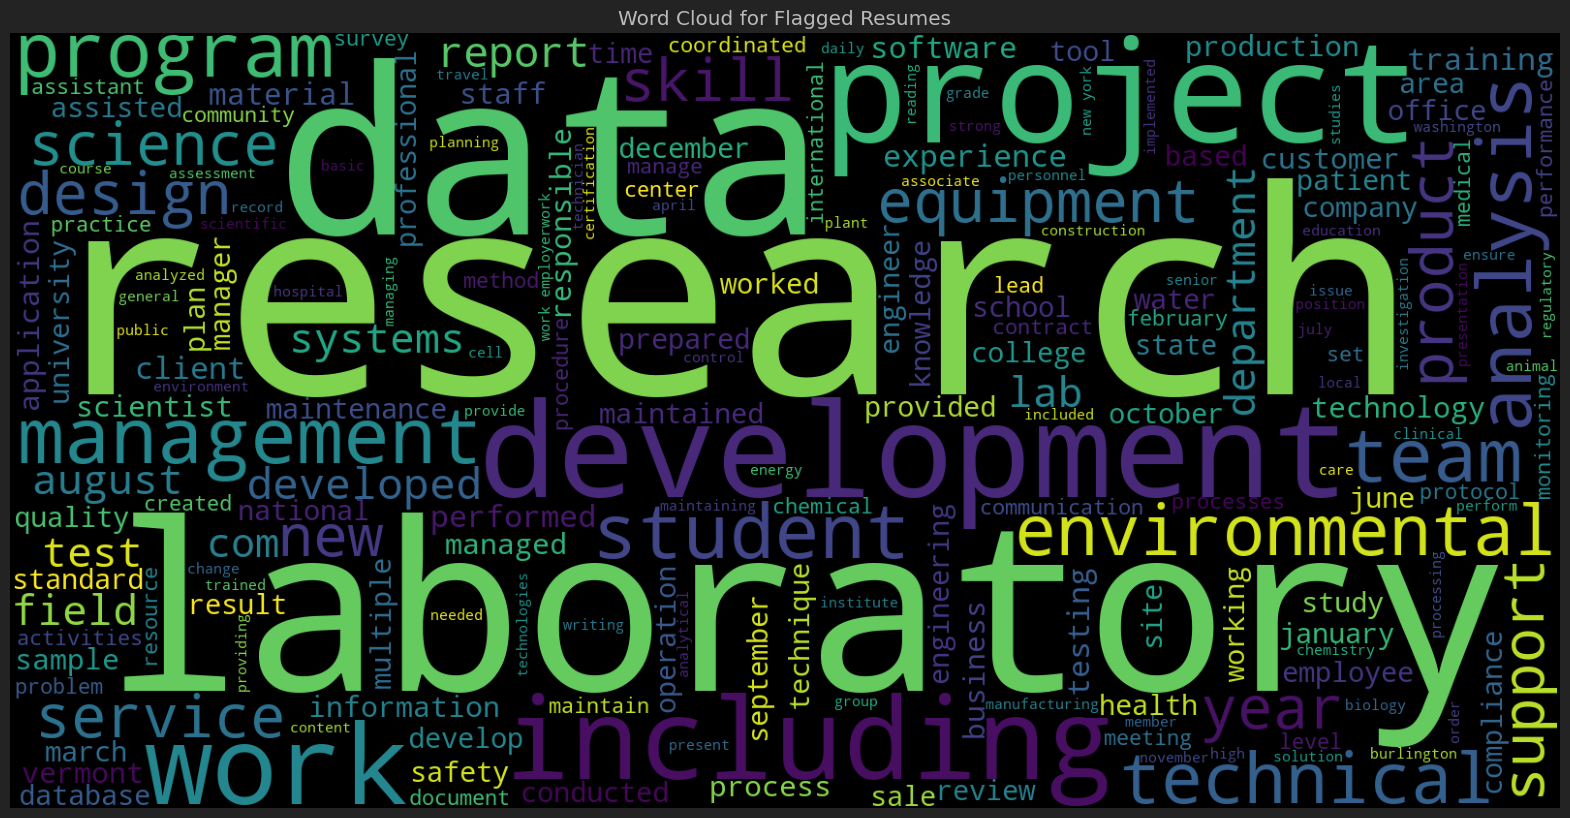

In [26]:
# Plot the word cloud for text that is flagged
plt.figure(figsize=(20, 20))  # Set the figure size for the plot

# Generate the word cloud from cleaned text of flagged resumes
wc = WordCloud(max_words=200, width=1600, height=800, stopwords=stop_words).generate(' '.join(resume_df[resume_df['class'] == 0]['cleaned']))

# Display the generated word cloud
plt.imshow(wc)  # Show the word cloud image
plt.axis('off')  # Hide axes for better visualization
plt.title('Word Cloud for Flagged Resumes')  # Title for the plot
plt.show()  

#  PREPARE THE DATA BY APPLYING COUNT VECTORIZER

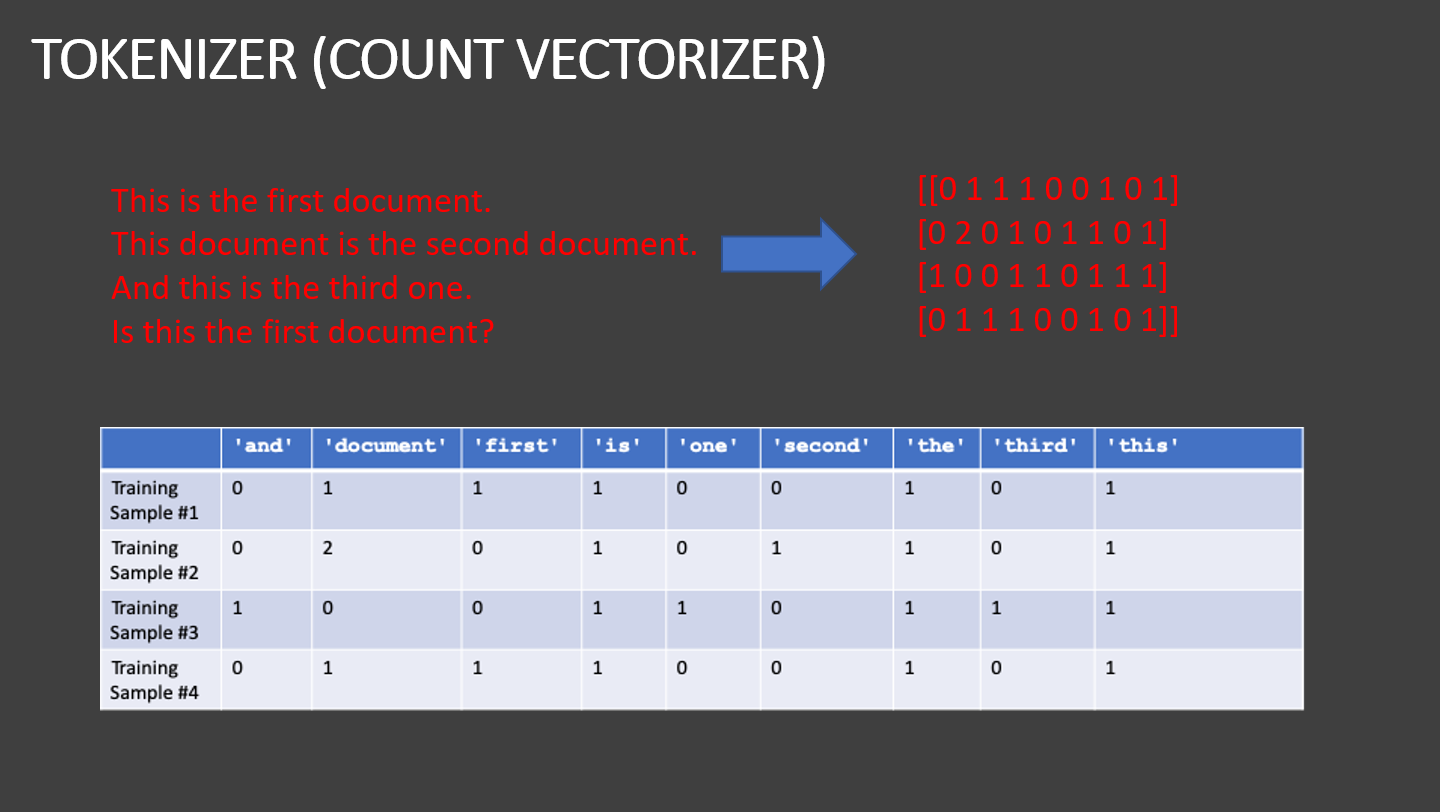

In [27]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [28]:
# Print the feature names using the updated method
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [29]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [30]:
# Applying CountVectorizer to the cleaned text
vectorizer = CountVectorizer()  # Create an instance of CountVectorizer
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])  # Fit and transform the 'cleaned' column

In [31]:
# Print feature names
print(vectorizer.get_feature_names_out())  

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [32]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#  UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS 

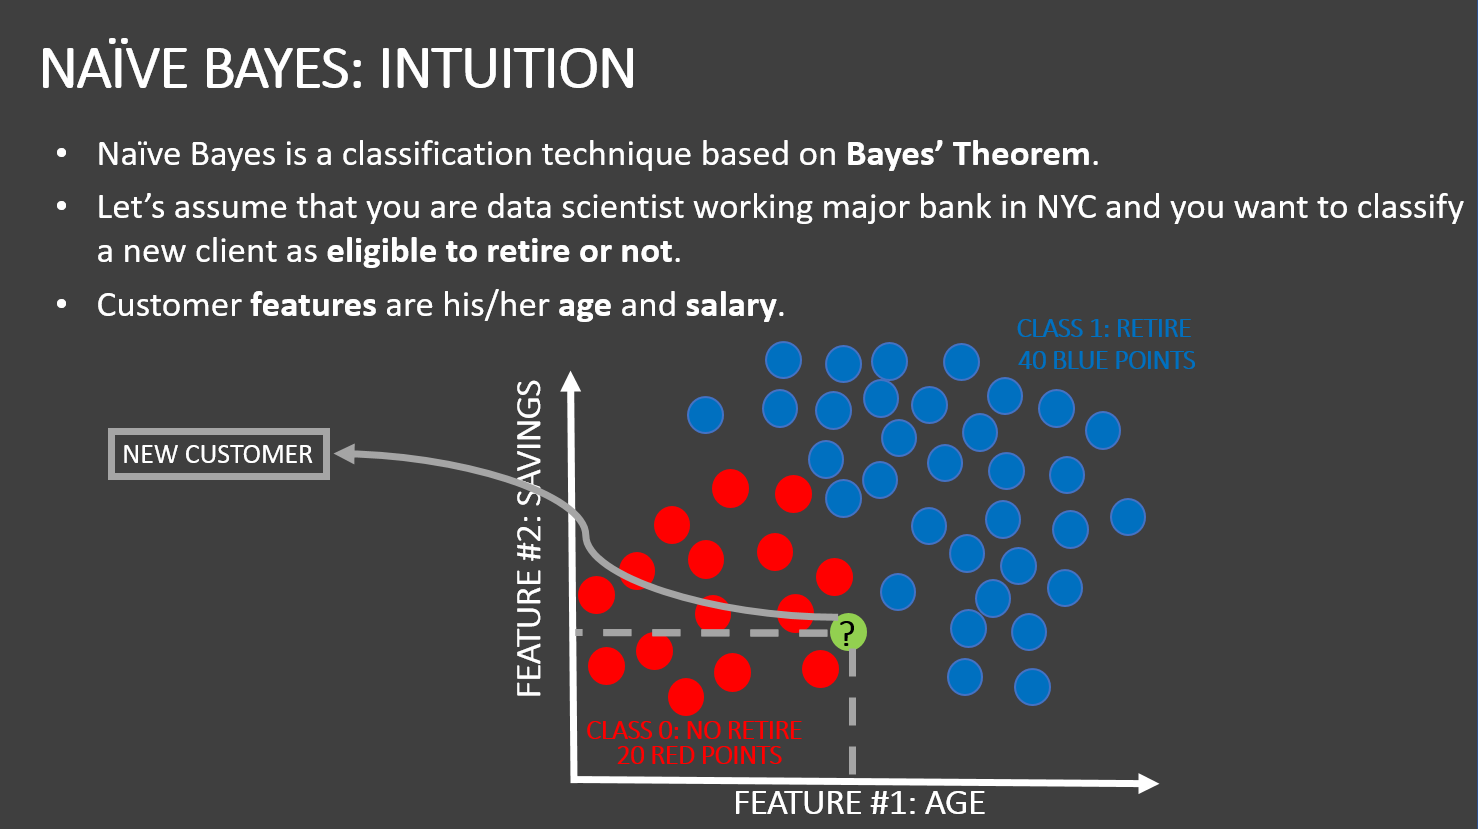

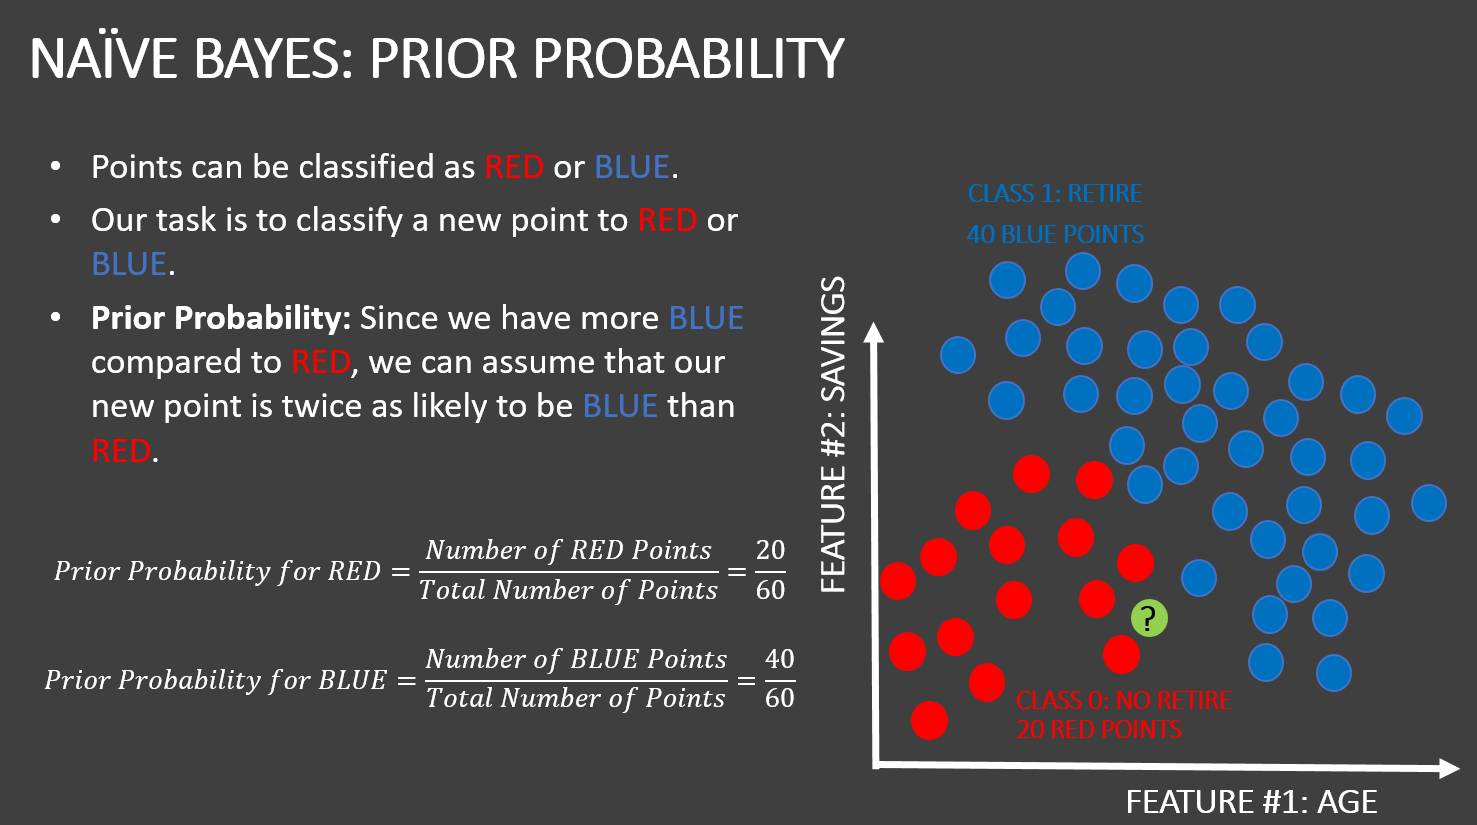

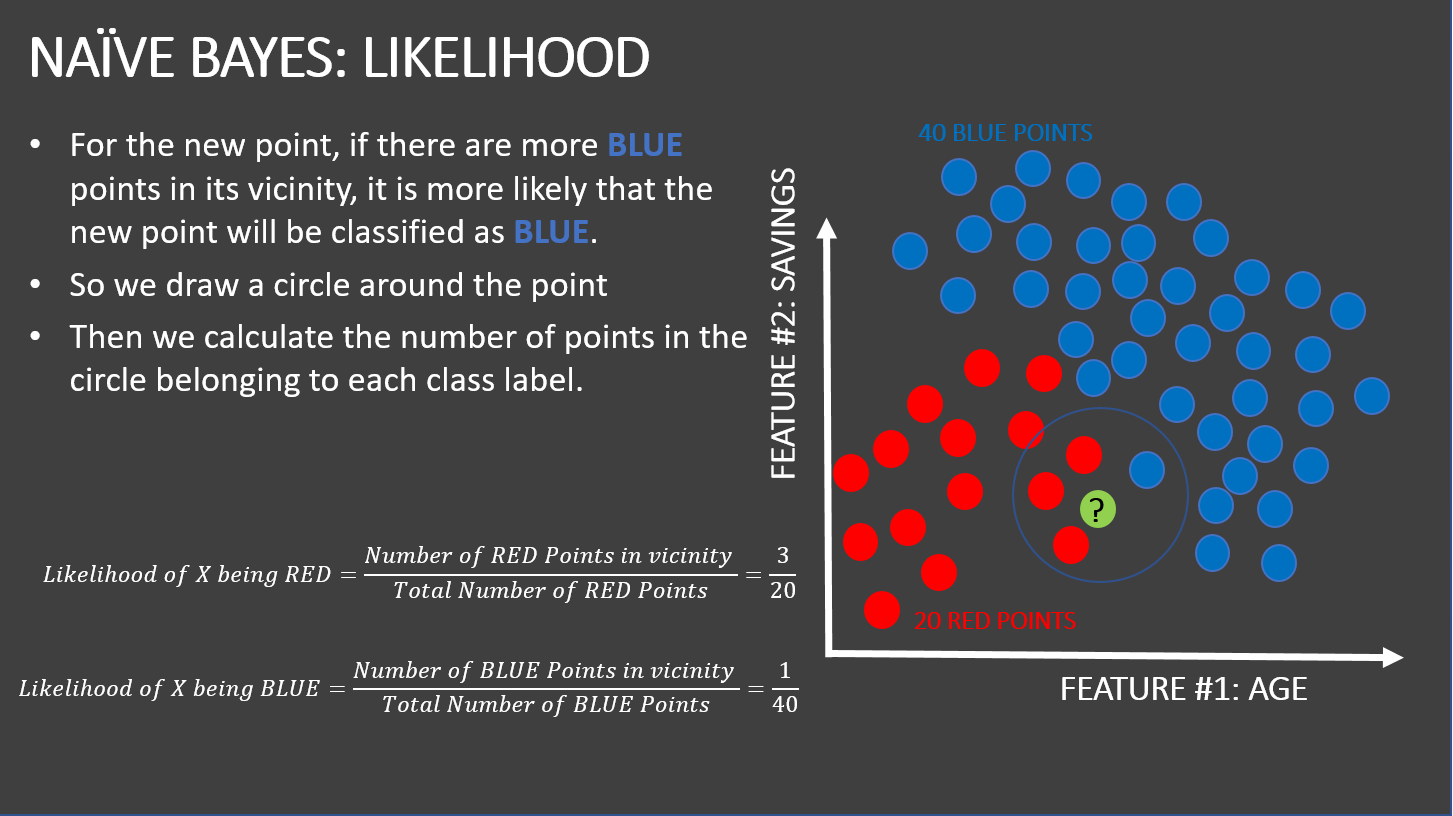

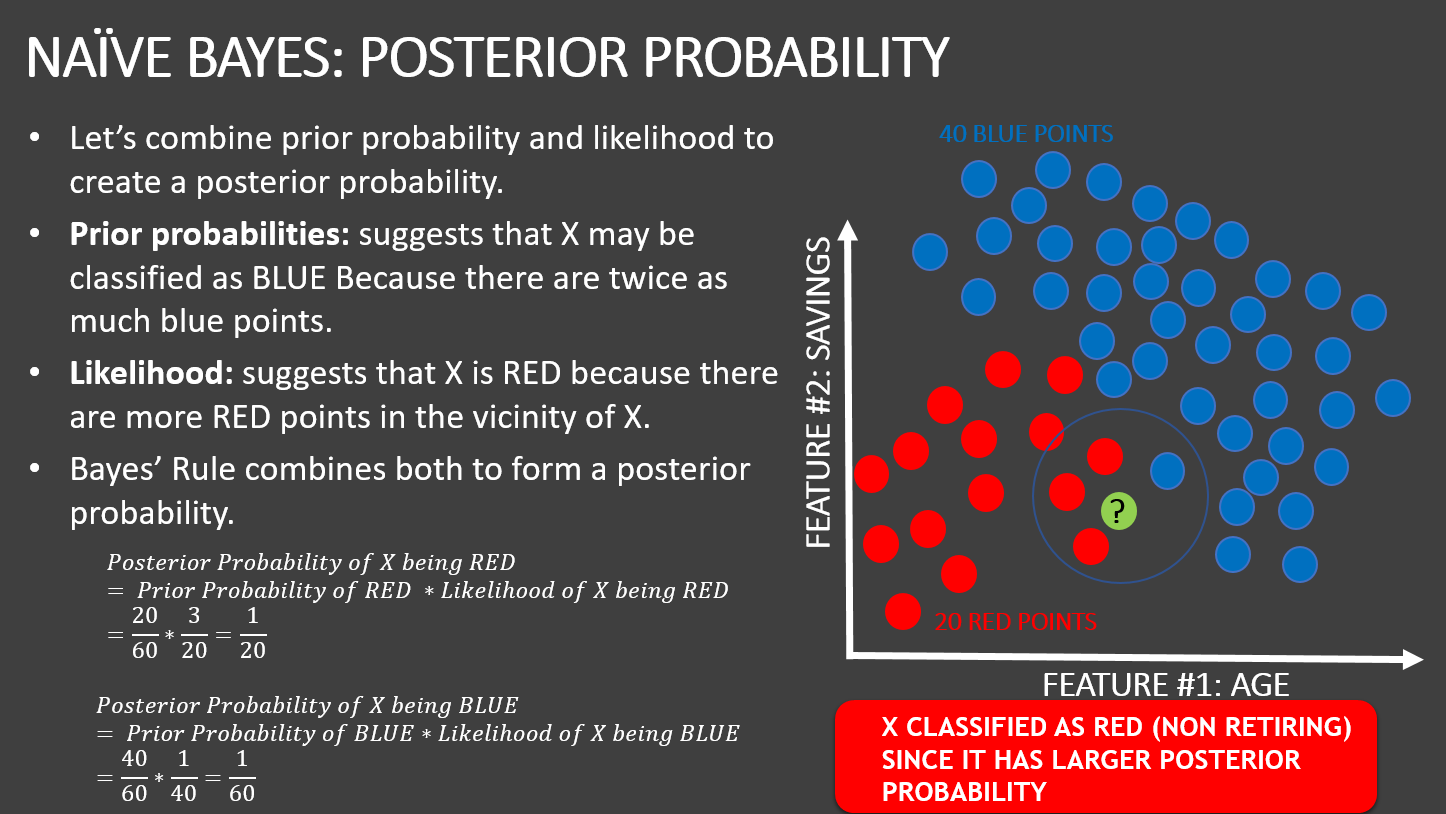

#  UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS 

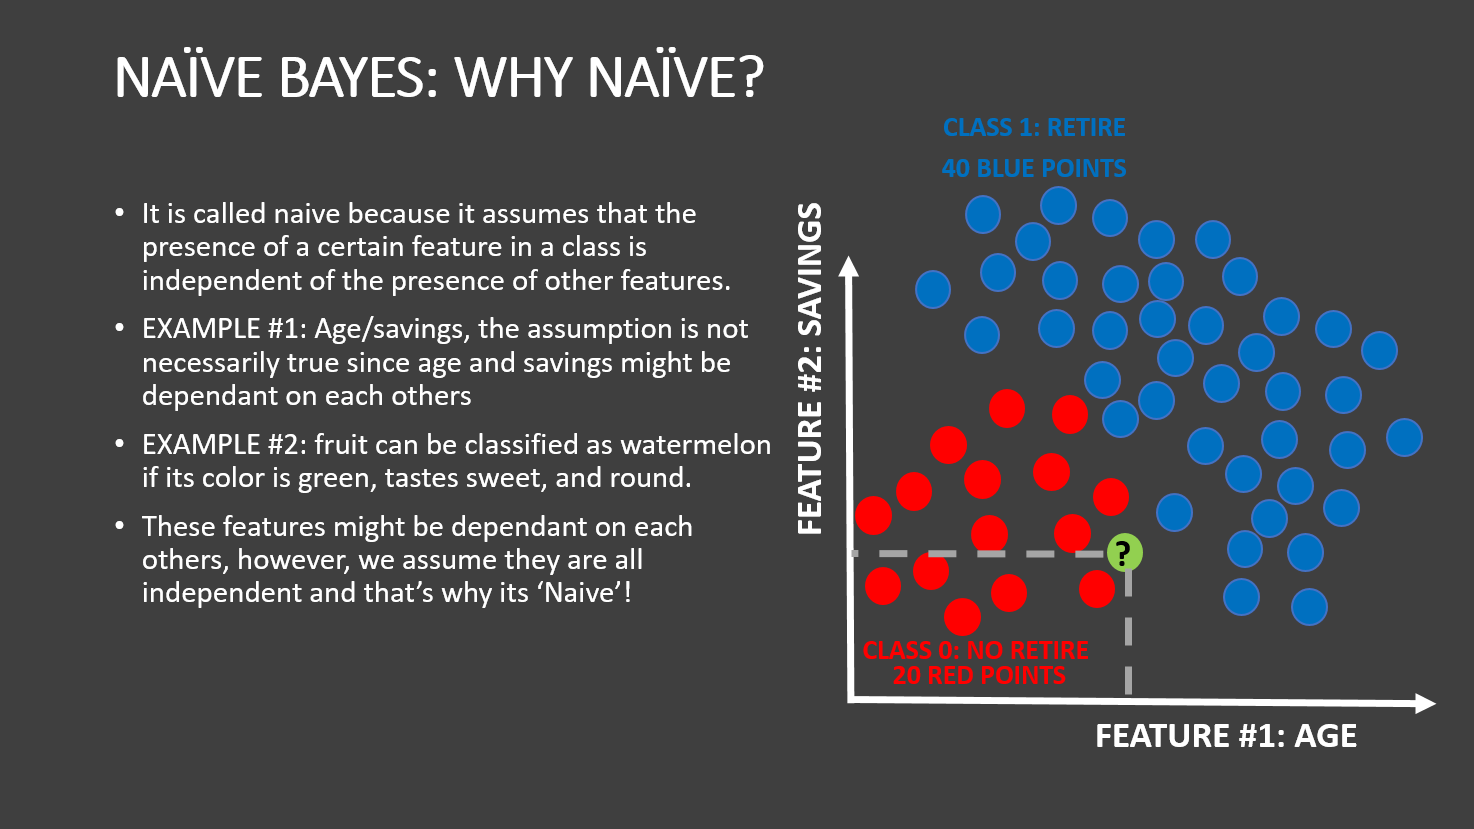

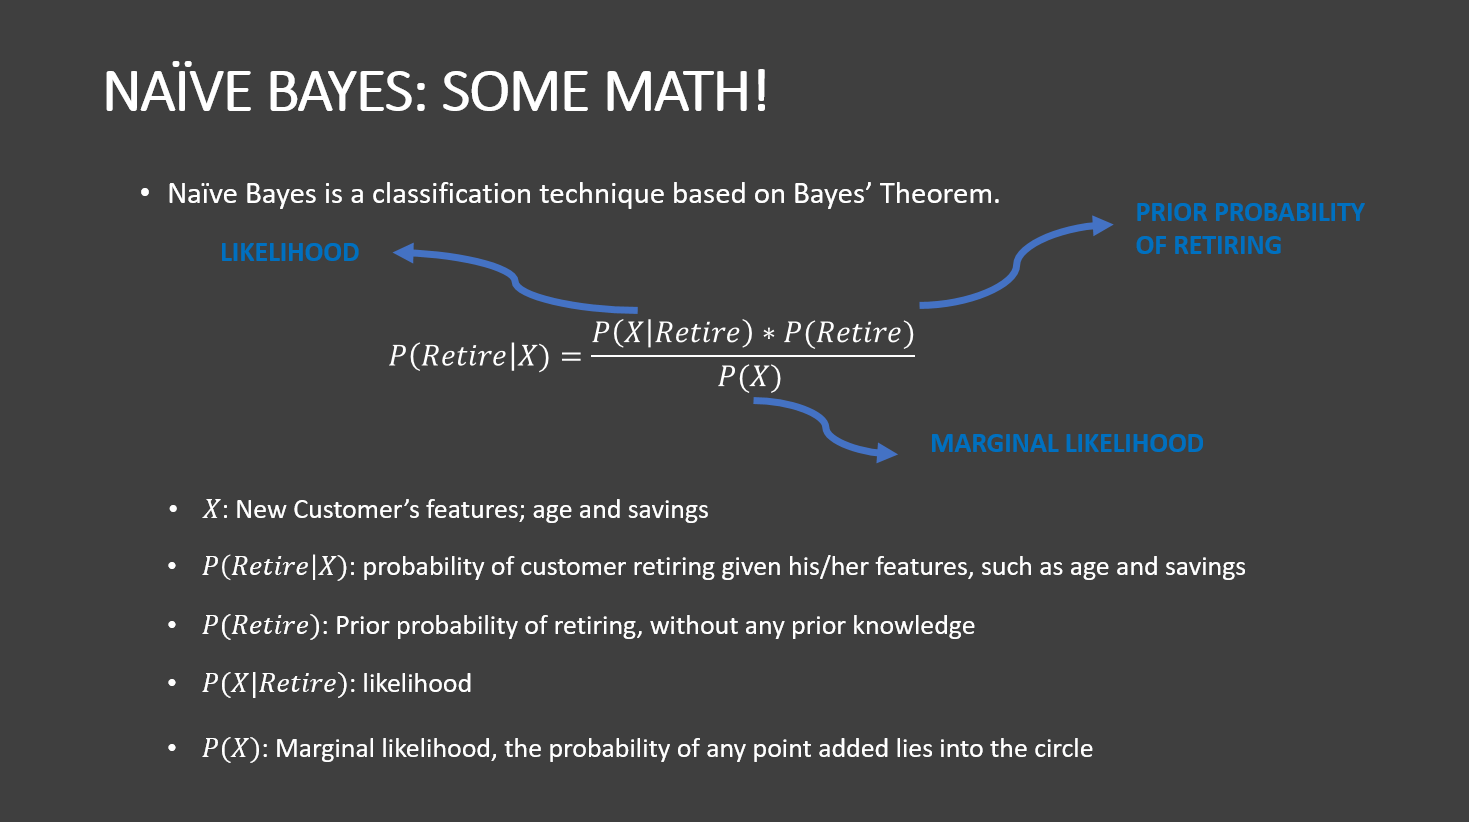

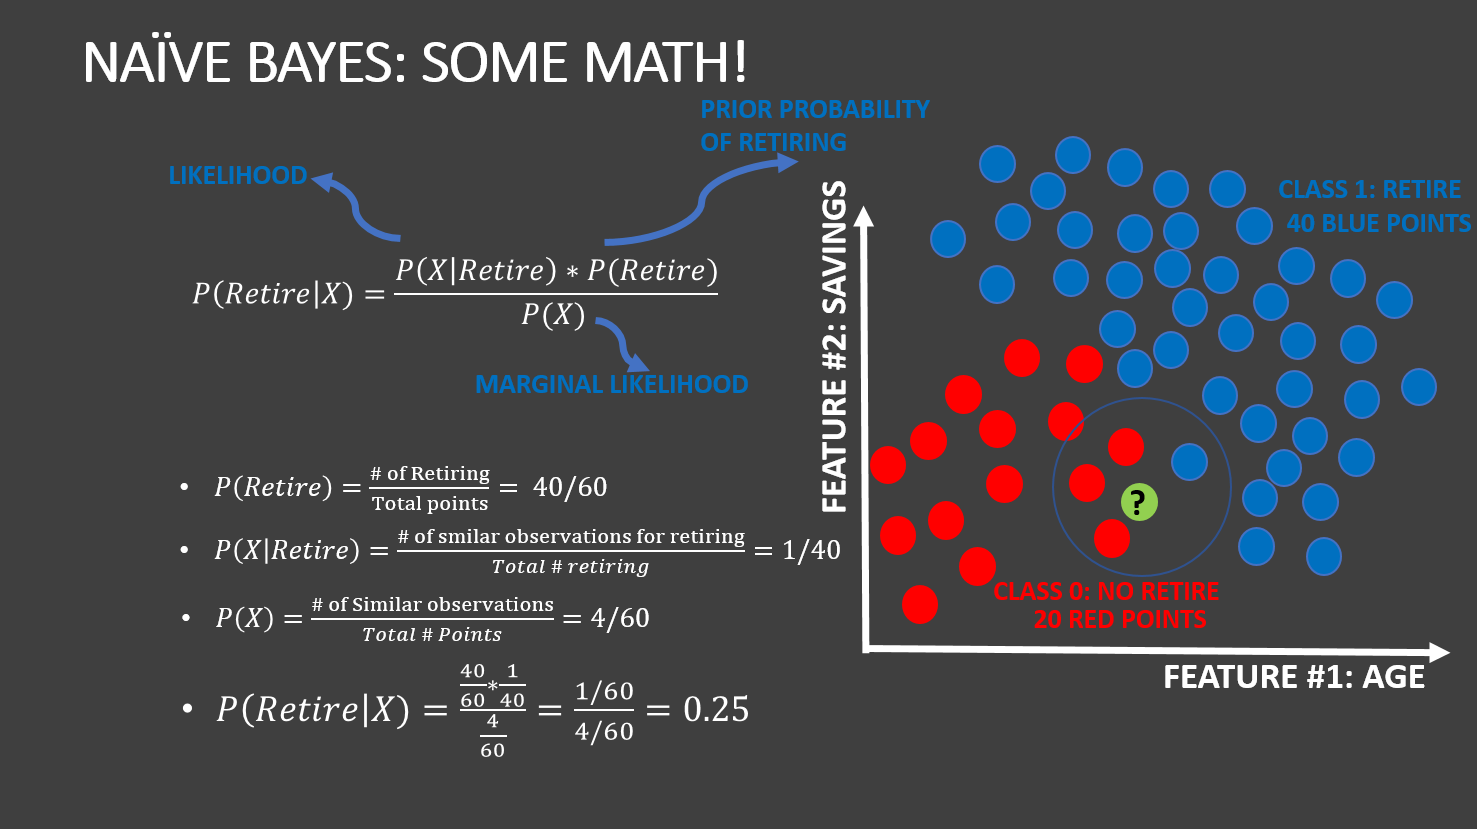

# TRAIN NAIVE BAYES CLASSIFIER MODEL

In [33]:
countvectorizer

<125x11315 sparse matrix of type '<class 'numpy.int64'>'
	with 35811 stored elements in Compressed Sparse Row format>

In [34]:
x = countvectorizer

In [35]:
y = resume_df['class']

In [36]:
x.shape

(125, 11315)

In [37]:
y.shape

(125,)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
#(70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)



MultinomialNB()

#  ASSESS TRAINED MODEL PERFORMANCE


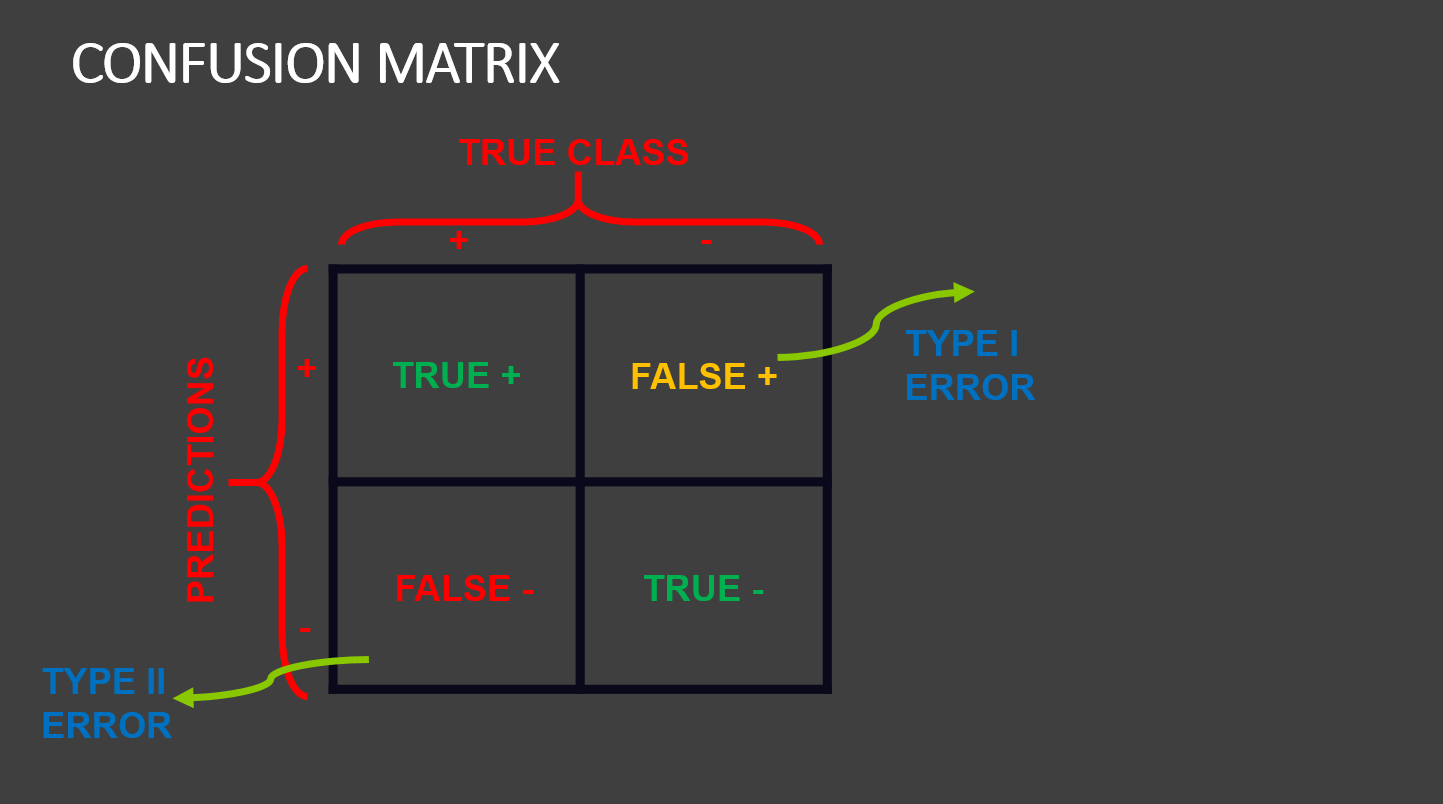

<AxesSubplot: >

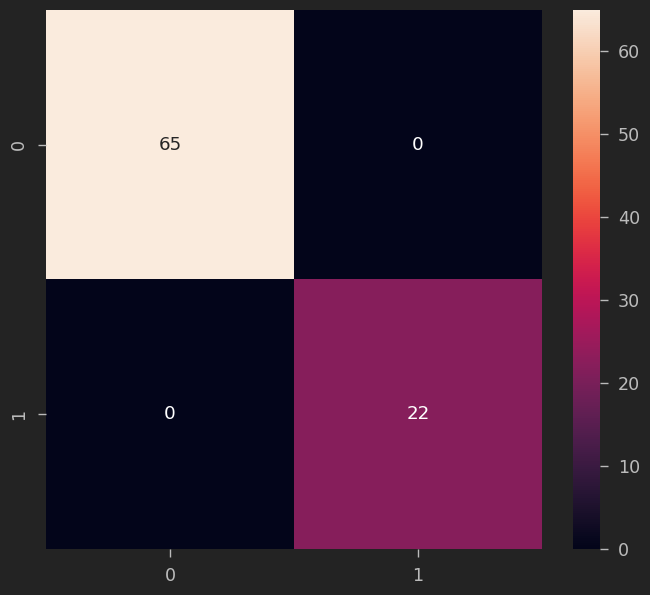

In [41]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot: >

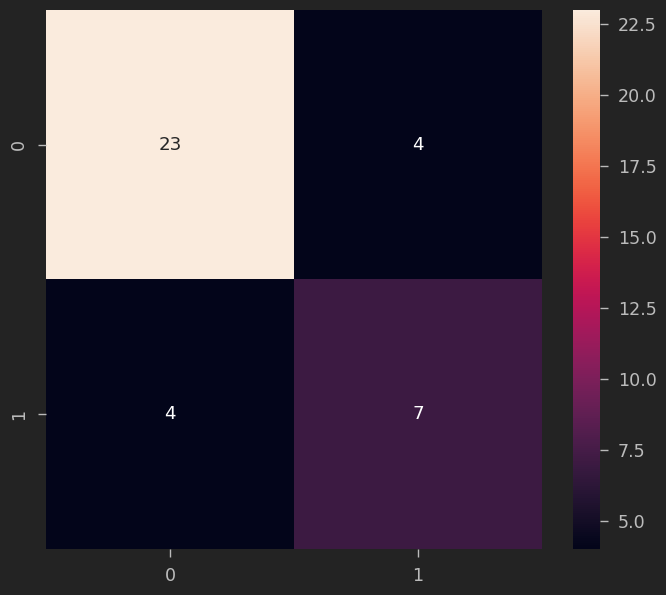

In [42]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [43]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.64      0.64      0.64        11

    accuracy                           0.79        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.79      0.79      0.79        38

